# Loan Prediction

Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.

Independent Variables:
1.Loan_ID

2.Gender

3.Married

4.Dependents

5.Education

6.Self_Employed

7.ApplicantIncome

8.CoapplicantIncome

9.Loan_Amount

10.Loan_Amount_Term

11.Credit History

12.Property_Area

Dependent Variable (Target Variable):

Loan_Status

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('loan-prediction.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
data.shape

(614, 13)

In [6]:
data.duplicated().sum()

0

There is no duplicate data present in our dataset

In [7]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


As we can see Applicant income contain integer, Coapplicant income,Loanamount,Loanamountterm,Credithistory contain float datatypes and rest other contain object as datatype

In [9]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

As we can see dataset contain some missing values

<Axes: >

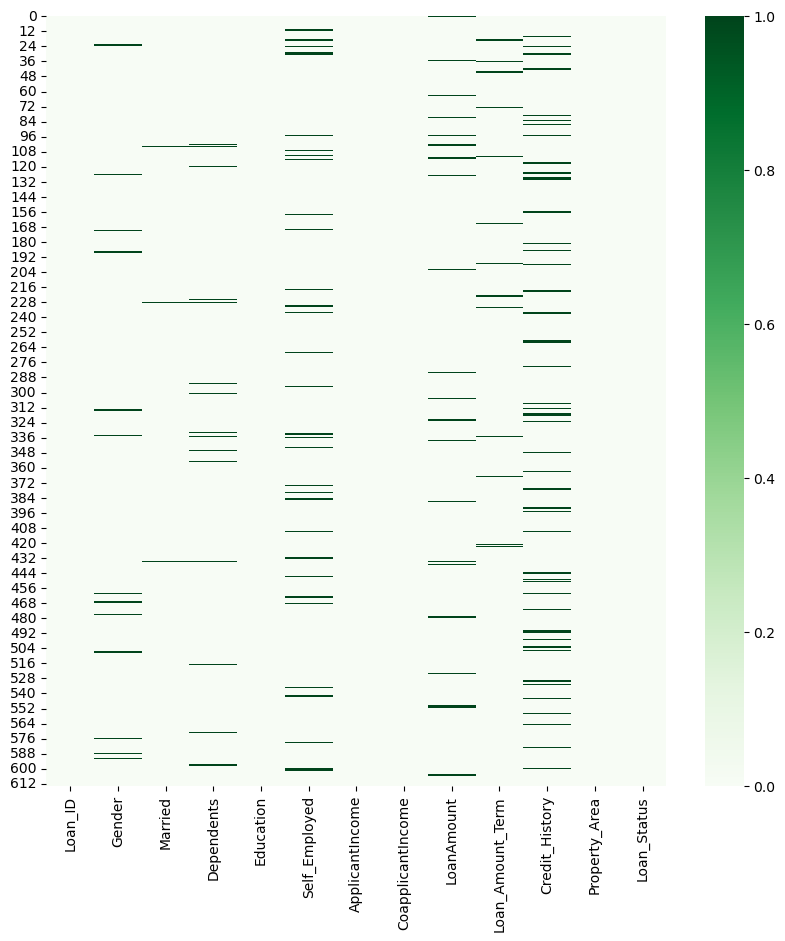

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(data.isnull(),cmap='Greens')

# EDA

Male      489
Female    112
Name: Gender, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

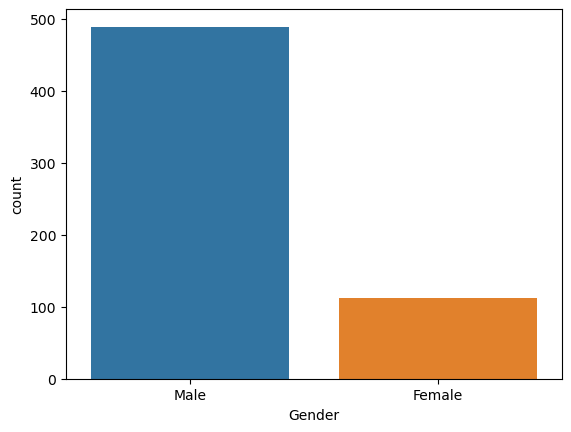

In [11]:
print(data['Gender'].value_counts())
sns.countplot(x='Gender',data=data)

The male count is more compared to female

Yes    398
No     213
Name: Married, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

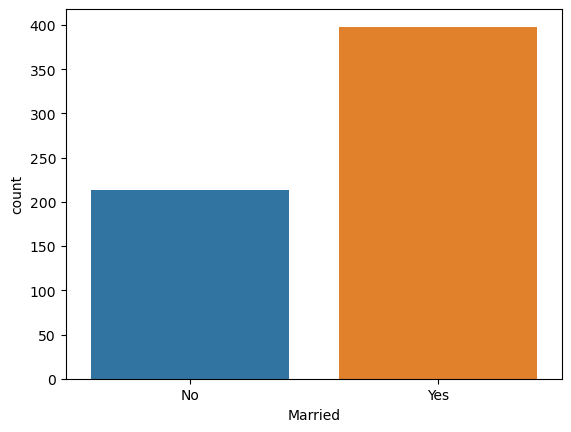

In [12]:
print(data['Married'].value_counts())
sns.countplot(x='Married',data=data)

Married people has count is more compared to female

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

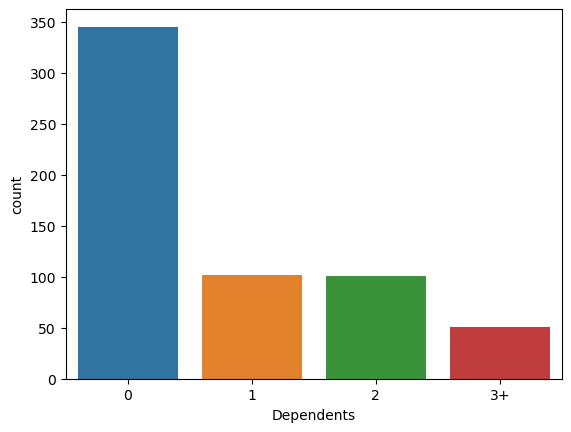

In [13]:
print(data['Dependents'].value_counts())
sns.countplot(x='Dependents',data=data)

The count of dependents 0 is highest followed by 1 and 2 and  count of dependents 3+ is least

No     500
Yes     82
Name: Self_Employed, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

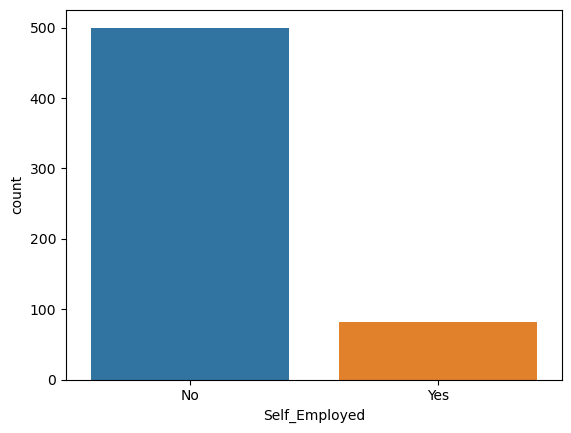

In [14]:
print(data['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed',data=data)

The count of people whose are self-employed is lowest and person whose are not self-employed count is highest

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

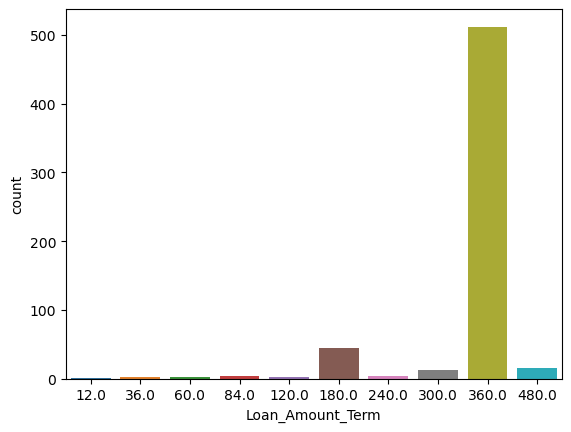

In [15]:
print(data['Loan_Amount_Term'].value_counts())
sns.countplot(x='Loan_Amount_Term',data=data)

The count of loan amount term is highest for 360 

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

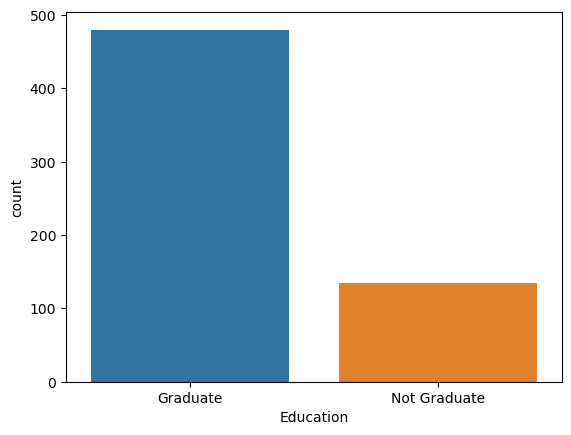

In [16]:
print(data['Education'].value_counts())
sns.countplot(x='Education',data=data)

The count of Graduate is more as compared to Not graduate

Y    422
N    192
Name: Loan_Status, dtype: int64


<Axes: xlabel='Loan_Status', ylabel='count'>

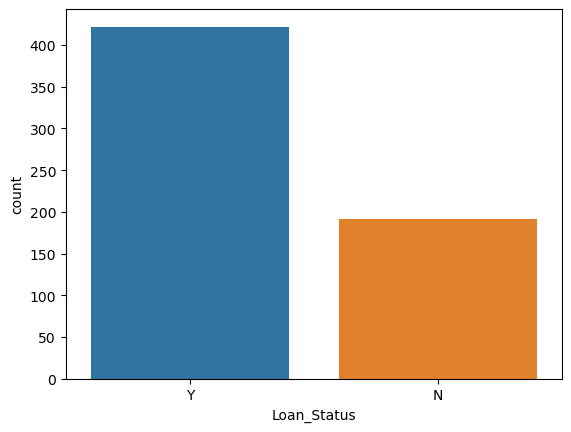

In [17]:
print(data['Loan_Status'].value_counts())
sns.countplot(x='Loan_Status',data=data)

The count of loan status for Yes is highest compared to No

1.0    475
0.0     89
Name: Credit_History, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

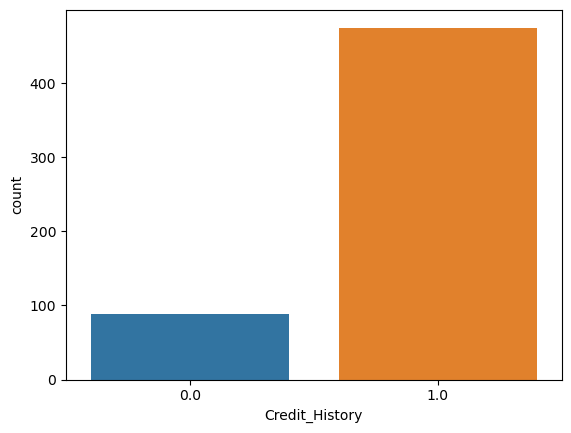

In [18]:
print(data['Credit_History'].value_counts())
sns.countplot(x='Credit_History',data=data)

The count of credit history for 1 is highest compared to 0 credit history

In [19]:
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace=True)

Now we are replacing the null value by the mean and mode

In [20]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now we have replace the null values 

<Axes: >

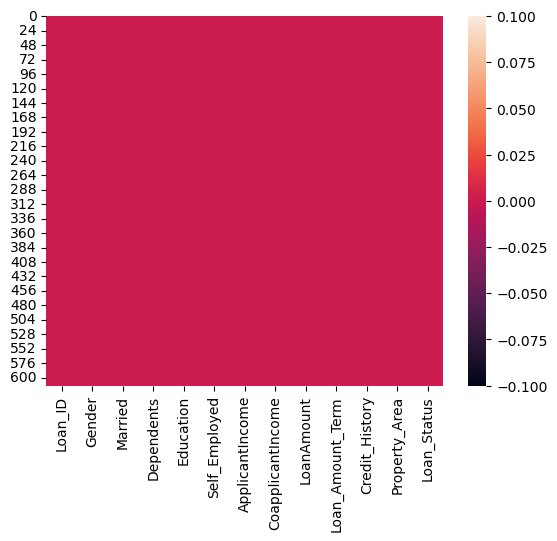

In [21]:
sns.heatmap(data.isnull())

Male      502
Female    112
Name: Gender, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

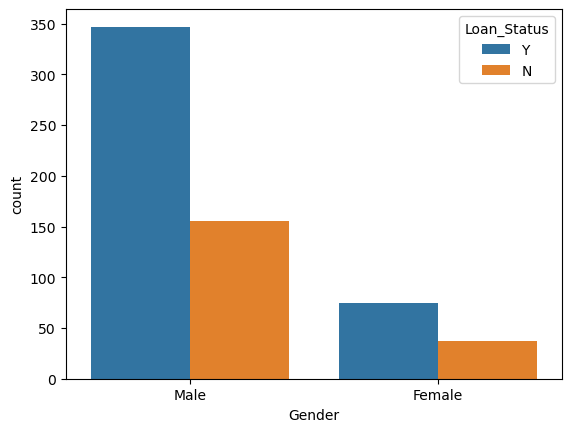

In [22]:
print(data['Gender'].value_counts())
sns.countplot(x='Gender',hue='Loan_Status',data=data)

1.From the above countplot the male count with loan status yes is more compared to loan status NO
2.Female with loan status yes the count is more comapred to female with no loan status

Yes    401
No     213
Name: Married, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

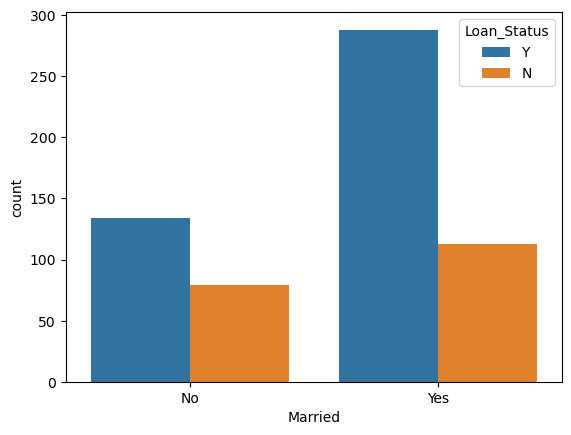

In [23]:
print(data['Married'].value_counts())
sns.countplot(data=data,x='Married',hue='Loan_Status')

1.For people with married status in the count of male with loan status yes has more count comapred to female with loan status yes
2.People who are not married-in that count of male with loan status no has more count compared with female


0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

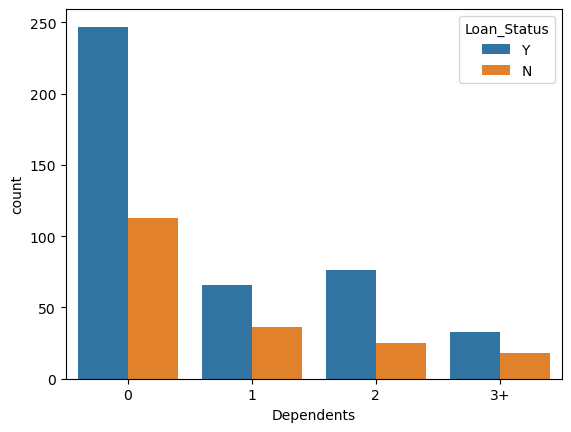

In [24]:
print(data['Dependents'].value_counts())
sns.countplot(x='Dependents',data=data,hue='Loan_Status')

<bound method IndexOpsMixin.value_counts of 0          Graduate
1          Graduate
2          Graduate
3      Not Graduate
4          Graduate
           ...     
609        Graduate
610        Graduate
611        Graduate
612        Graduate
613        Graduate
Name: Education, Length: 614, dtype: object>


<Axes: xlabel='Education', ylabel='count'>

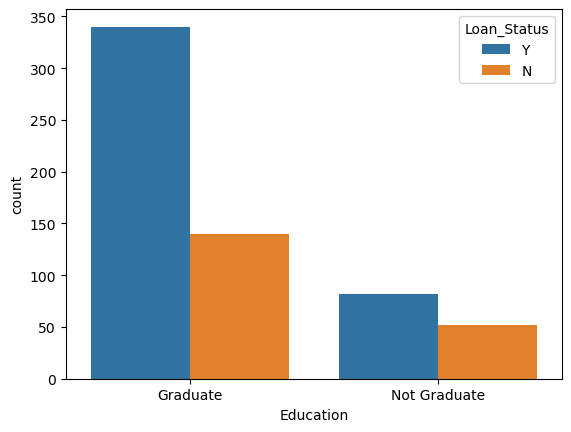

In [25]:
print(data['Education'].value_counts)
sns.countplot(x='Education',data=data,hue='Loan_Status')

People who are graduate-count of loan status yes in more comapred to no loan status
In not graduate- the count loan status yes in more compared to no loan status

array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>,
        <Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'Loan_Amount_Term'}>,
        <Axes: title={'center': 'Credit_History'}>],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

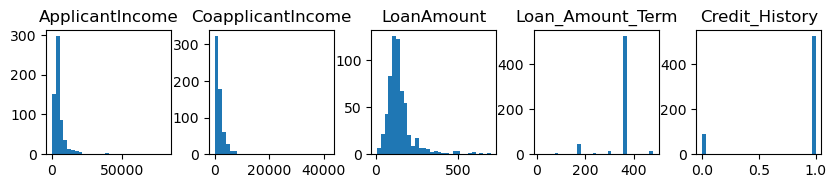

In [26]:
data.hist(figsize=(10,10),layout=(5,5),bins=30,grid=False)

In [27]:
data.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

As we can see Applicantincome,Coapplicantincome,Loanamount has skewness so we are removing the skewness from these 

In [28]:
data['ApplicantIncome']=np.cbrt(data['ApplicantIncome'])
data['CoapplicantIncome']=np.cbrt(data['CoapplicantIncome'])
data['LoanAmount']=np.cbrt(data['LoanAmount'])

In [29]:
data.skew()

ApplicantIncome      2.083638
CoapplicantIncome    0.196726
LoanAmount           0.862715
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

We have removed skewness from these

array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>,
        <Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'Loan_Amount_Term'}>,
        <Axes: title={'center': 'Credit_History'}>],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

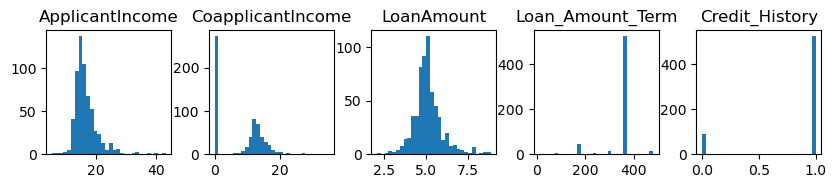

In [30]:
data.hist(figsize=(10,10),layout=(5,5),bins=30,grid=False)

ApplicantIncome         Axes(0.125,0.747241;0.133621x0.132759)
CoapplicantIncome    Axes(0.285345,0.747241;0.133621x0.132759)
LoanAmount            Axes(0.44569,0.747241;0.133621x0.132759)
Loan_Amount_Term     Axes(0.606034,0.747241;0.133621x0.132759)
Credit_History       Axes(0.766379,0.747241;0.133621x0.132759)
dtype: object

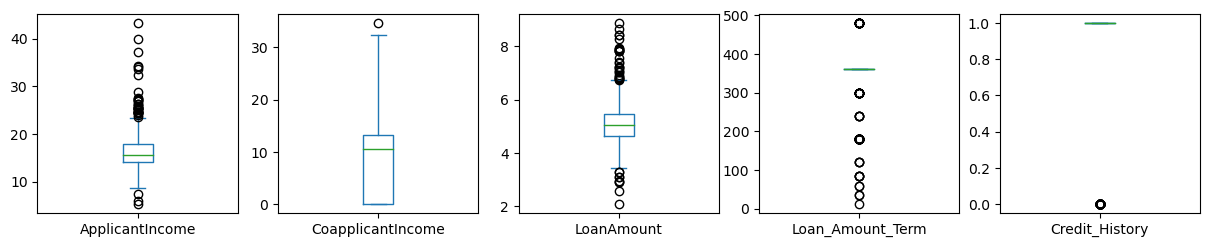

In [31]:
data.plot(kind='box',subplots=True,layout=(5,5),figsize=(15,15))

As we can see applicantincome,coapplicantincome,loanamount,loan amount term and credit history has the outliers whic we can remove by using zscore method 

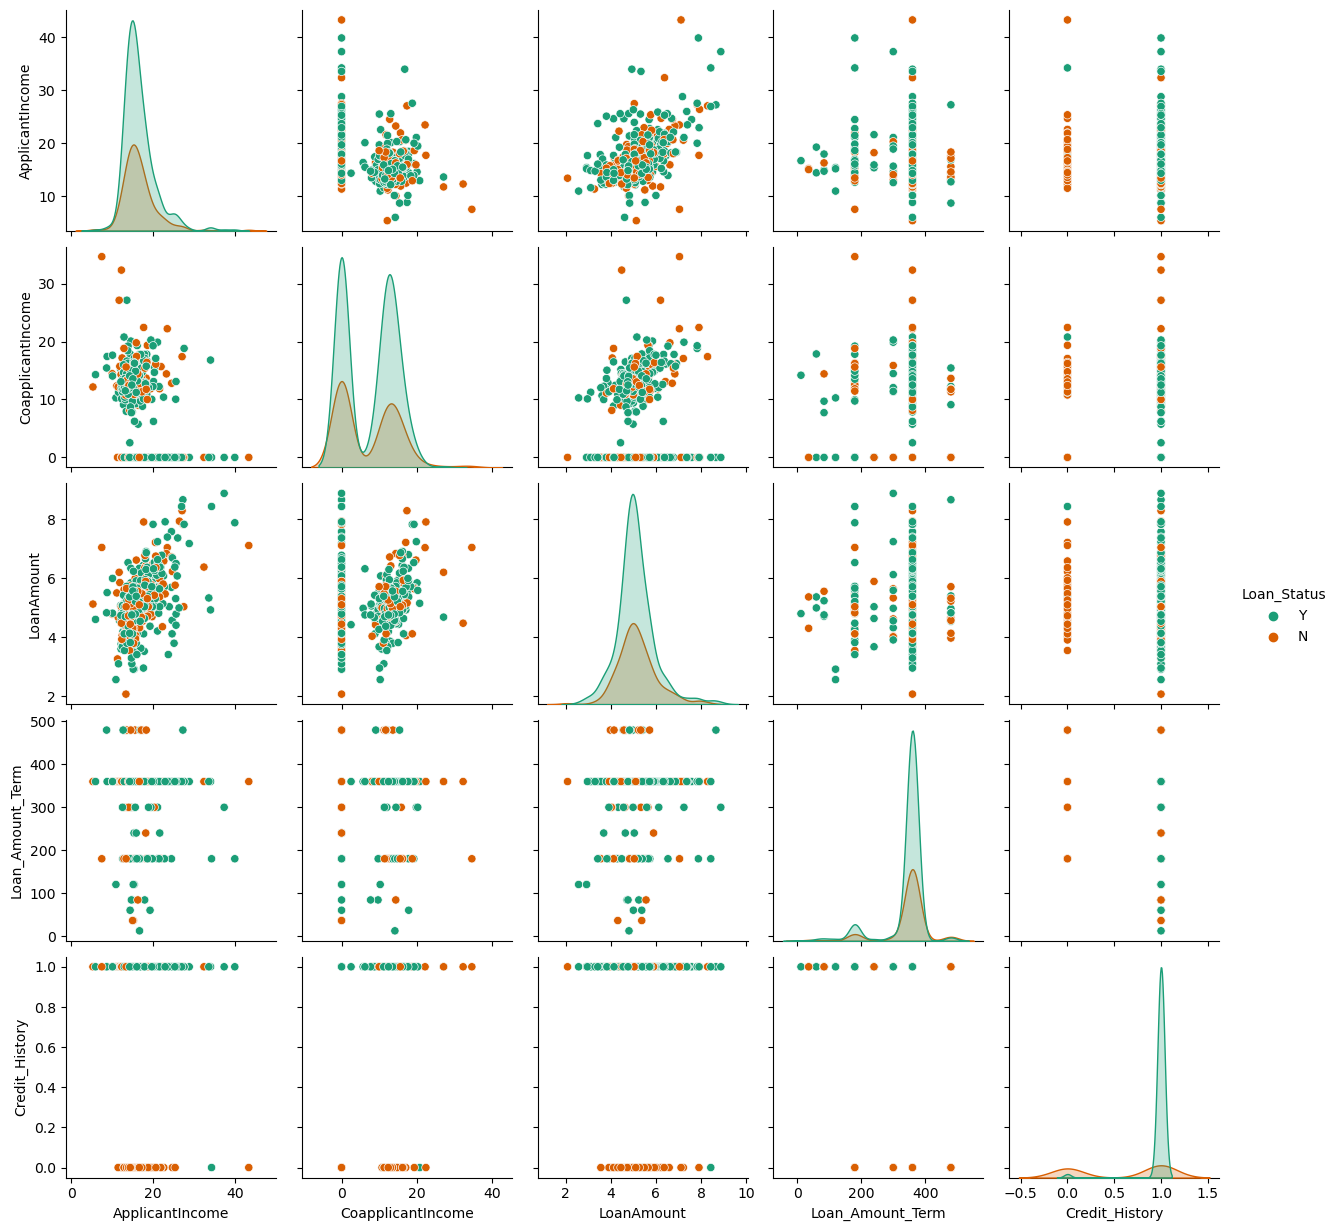

In [32]:
sns.pairplot(data,hue='Loan_Status',palette='Dark2')

1.Count of Loan amount term with loan status yes is more compared to the no loan status

2.Loan amount for the people those have loan yes is more compared to those who do not have loan

3.Applicant income for people with loan status yes is more compared to those no loan status

4.Loan amount for those who have loan is more compared to no loan status

In [33]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,16.520506,7.480926,5.117484,342.410423,0.855049
std,3.939230,7.108669,0.854684,64.428629,0.352339
min,5.313293,0.000000,2.080084,12.000000,0.000000
25%,14.223454,0.000000,4.645444,360.000000,1.000000
50%,15.621999,10.592145,5.039684,360.000000,1.000000
75%,17.961849,13.194779,5.482031,360.000000,1.000000
max,43.267487,34.668156,8.879040,480.000000,1.000000


1. Applican income,Loanamount has right side skewness because mean is greater than median

2. Coapplicantincome,Loan amount term and credit histor shows left side skewness because mean is less than median

3. Applicantincome,Coapplicantincome,Loanamount term shows sudden increase in value between 75% quantile and max value which indicate there will be outlier but we can confirmed the presence of outliers by boxplot

In [34]:
object_data=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in object_data:
    data[i]=le.fit_transform(data[i])
data


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,18.017473,0.000000,5.039684,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,16.610522,11.467457,5.039684,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,14.422496,0.000000,4.041240,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,13.720654,13.310098,4.932424,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,18.171206,0.000000,5.204828,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,14.260431,0.000000,4.140818,360.0,1.0,0,1
610,LP002979,1,1,3+,0,0,16.013010,0.000000,3.419952,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,20.059821,6.214465,6.324704,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,19.646281,0.000000,5.718479,360.0,1.0,2,1


Dropping loand_id beacuse it is not useful for out machine learning

In [35]:
data.drop('Loan_ID',axis=1,inplace=True)

In [36]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,18.017473,0.000000,5.039684,360.0,1.0,2,1
1,1,1,1,0,0,16.610522,11.467457,5.039684,360.0,1.0,0,0
2,1,1,0,0,1,14.422496,0.000000,4.041240,360.0,1.0,2,1
3,1,1,0,1,0,13.720654,13.310098,4.932424,360.0,1.0,2,1
4,1,0,0,0,0,18.171206,0.000000,5.204828,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,14.260431,0.000000,4.140818,360.0,1.0,0,1
610,1,1,3+,0,0,16.013010,0.000000,3.419952,180.0,1.0,0,1
611,1,1,1,0,0,20.059821,6.214465,6.324704,360.0,1.0,2,1
612,1,1,2,0,0,19.646281,0.000000,5.718479,360.0,1.0,2,1


In [37]:
data['Dependents']=data.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [38]:
from scipy.stats import zscore
df1=np.abs(zscore(data))
print(np.where(df1>3))

(array([ 14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 183, 185,
       242, 262, 308, 313, 333, 333, 369, 409, 443, 487, 495, 497, 506,
       523, 546, 561, 568, 575, 581, 585, 600, 604], dtype=int64), array([8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 7, 5, 5, 8, 8, 7, 8, 5, 7, 7, 5, 5,
       7, 8, 8, 7, 7, 8, 7, 7, 8, 6, 8, 6, 7], dtype=int64))


In [39]:
dfn=data[(df1<3).all(axis=1)]
dfn

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,18.017473,0.000000,5.039684,360.0,1.0,2,1
1,1,1,1,0,0,16.610522,11.467457,5.039684,360.0,1.0,0,0
2,1,1,0,0,1,14.422496,0.000000,4.041240,360.0,1.0,2,1
3,1,1,0,1,0,13.720654,13.310098,4.932424,360.0,1.0,2,1
4,1,0,0,0,0,18.171206,0.000000,5.204828,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,14.260431,0.000000,4.140818,360.0,1.0,0,1
610,1,1,3,0,0,16.013010,0.000000,3.419952,180.0,1.0,0,1
611,1,1,1,0,0,20.059821,6.214465,6.324704,360.0,1.0,2,1
612,1,1,2,0,0,19.646281,0.000000,5.718479,360.0,1.0,2,1


In [40]:
dfn.shape

(582, 12)

In [41]:
data.shape

(614, 12)

In [42]:
dfn.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.373902,0.185866,0.041137,-0.004520,0.051840,0.226509,0.164751,-0.103268,0.016770,-0.022082,0.011717
Married,0.373902,1.000000,0.331888,0.023242,-0.009041,-0.015032,0.309949,0.174630,-0.126257,0.020354,0.013420,0.079691
Dependents,0.185866,0.331888,1.000000,0.068151,0.056119,0.096422,-0.003614,0.127213,-0.086477,-0.019185,0.003804,0.010835
Education,0.041137,0.023242,0.068151,1.000000,-0.010823,-0.182341,0.024339,-0.142547,-0.091462,-0.077010,-0.067049,-0.093325
Self_Employed,-0.004520,-0.009041,0.056119,-0.010823,1.000000,0.224899,-0.070692,0.126217,-0.030897,-0.013259,-0.027306,-0.031113
ApplicantIncome,0.051840,-0.015032,0.096422,-0.182341,0.224899,1.000000,-0.347312,0.467396,-0.059484,0.039283,-0.020535,-0.000754
CoapplicantIncome,0.226509,0.309949,-0.003614,0.024339,-0.070692,-0.347312,1.000000,0.210665,-0.010061,0.005789,-0.069516,0.054170
LoanAmount,0.164751,0.174630,0.127213,-0.142547,0.126217,0.467396,0.210665,1.000000,0.055025,0.009641,-0.091148,-0.033975
Loan_Amount_Term,-0.103268,-0.126257,-0.086477,-0.091462,-0.030897,-0.059484,-0.010061,0.055025,1.000000,0.028194,-0.057486,-0.019746
Credit_History,0.016770,0.020354,-0.019185,-0.077010,-0.013259,0.039283,0.005789,0.009641,0.028194,1.000000,-0.009154,0.559425


<Axes: >

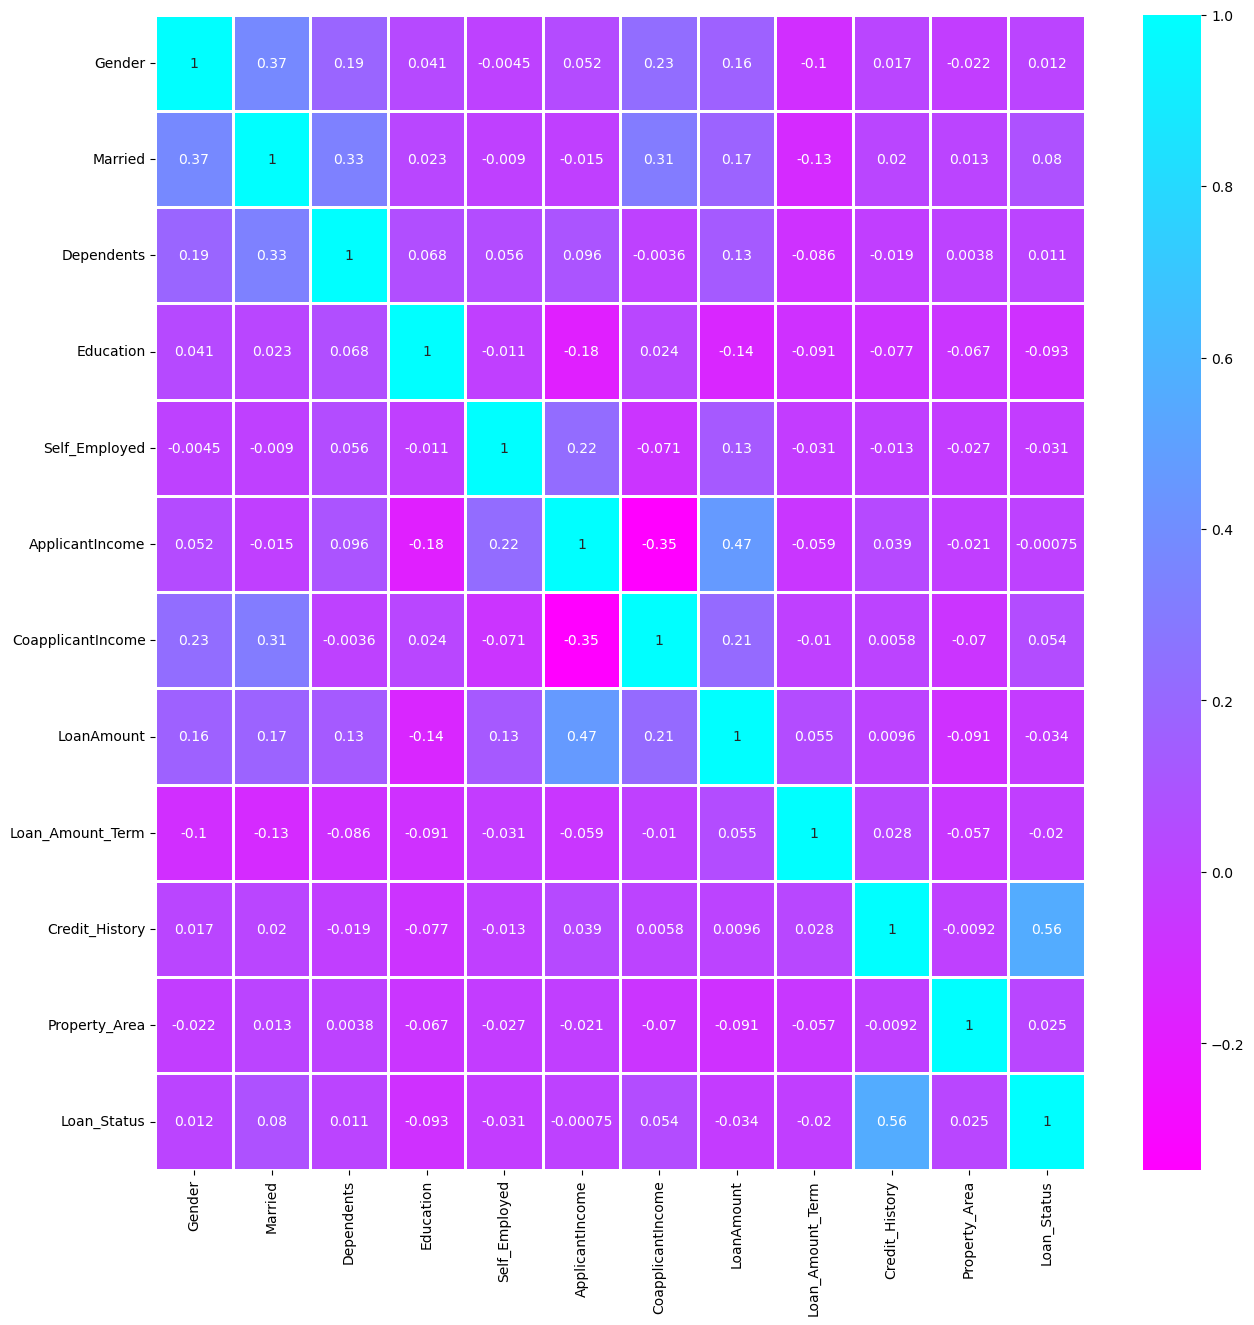

In [43]:
plt.figure(figsize=(15,15))
sns.heatmap(dfn.corr(),annot=True,cmap='cool_r',linewidths=2)

1.Dependents and education is positively correlated with each other

2.Loan amount and Loan amount term is positively correlated with each other

3.Credit history and Property area is negatively correlated with each other

4.Education and self employed are negative correlated with each other

5.Applicant income,loan amount and loan amount term are impacting negative relation to the loan status

In [44]:
x=dfn.drop('Loan_Status',axis=1)
y=dfn['Loan_Status']

In [45]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.471899,-1.366380,-0.726087,-0.538949,-0.384615,0.593212,-1.085906,-0.031686,0.229807,0.416398,1.233480
1,0.471899,0.731861,0.280062,-0.538949,-0.384615,0.138031,0.577354,-0.031686,0.229807,0.416398,-1.307708
2,0.471899,0.731861,-0.726087,-0.538949,2.600000,-0.569845,-1.085906,-1.438531,0.229807,0.416398,1.233480
3,0.471899,0.731861,-0.726087,1.855464,-0.384615,-0.796907,0.844614,-0.182820,0.229807,0.416398,1.233480
4,0.471899,-1.366380,-0.726087,-0.538949,-0.384615,0.642948,-1.085906,0.201007,0.229807,0.416398,1.233480
...,...,...,...,...,...,...,...,...,...,...,...
577,-2.119096,-1.366380,-0.726087,-0.538949,-0.384615,-0.622277,-1.085906,-1.298222,0.229807,0.416398,-1.307708
578,0.471899,0.731861,2.292362,-0.538949,-0.384615,-0.055277,-1.085906,-2.313948,-3.259257,0.416398,-1.307708
579,0.471899,0.731861,0.280062,-0.538949,-0.384615,1.253958,-0.184549,1.778953,0.229807,0.416398,1.233480
580,0.471899,0.731861,1.286212,-0.538949,-0.384615,1.120169,-1.085906,0.924760,0.229807,0.416398,1.233480


# VIF

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [47]:
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Features']=x.columns

vif

,VIF values,Features
0,1.213376,Gender
1,1.389835,Married
2,1.169567,Dependents
3,1.073400,Education
4,1.058347,Self_Employed
5,1.868556,ApplicantIncome
6,1.593807,CoapplicantIncome
7,1.664380,LoanAmount
8,1.057756,Loan_Amount_Term
9,1.010077,Credit_History


We can see there is no multicolinearity present in data

In [48]:
y.value_counts()

1    402
0    180
Name: Loan_Status, dtype: int64

In [49]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x1,y1=smt.fit_resample(x,y)

Defaulting to user installation because normal site-packages is not writeable


In [50]:
y1.value_counts()

1    402
0    402
Name: Loan_Status, dtype: int64

# Modelling

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [52]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    ET=ExtraTreesClassifier()
    ET.fit(x_train,y_train)
    ETpred=ET.predict(x_test)
    acc=accuracy_score(y_test,ETpred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is',maxAccu,'at Random state',maxRS)

Best accuracy is 0.8884297520661157 at Random state 77


In [53]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lrpred=lr.predict(x_test)
print(accuracy_score(y_test,lrpred))
print(confusion_matrix(y_test,lrpred))
print(classification_report(y_test,lrpred))

0.743801652892562
[[ 64  59]
 [  3 116]]
              precision    recall  f1-score   support

           0       0.96      0.52      0.67       123
           1       0.66      0.97      0.79       119

    accuracy                           0.74       242
   macro avg       0.81      0.75      0.73       242
weighted avg       0.81      0.74      0.73       242



In [54]:
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
ETpred=ET.predict(x_test)
print(accuracy_score(y_test,ETpred))
print(confusion_matrix(y_test,ETpred))
print(classification_report(y_test,ETpred))

0.8429752066115702
[[ 98  25]
 [ 13 106]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       123
           1       0.81      0.89      0.85       119

    accuracy                           0.84       242
   macro avg       0.85      0.84      0.84       242
weighted avg       0.85      0.84      0.84       242



In [55]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rfpred=rf.predict(x_test)
print(accuracy_score(y_test,rfpred))
print(confusion_matrix(y_test,rfpred))
print(classification_report(y_test,rfpred))

0.8471074380165289
[[ 95  28]
 [  9 110]]
              precision    recall  f1-score   support

           0       0.91      0.77      0.84       123
           1       0.80      0.92      0.86       119

    accuracy                           0.85       242
   macro avg       0.86      0.85      0.85       242
weighted avg       0.86      0.85      0.85       242



In [56]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dtpred=dt.predict(x_test)
print(accuracy_score(y_test,dtpred))
print(confusion_matrix(y_test,dtpred))
print(classification_report(y_test,dtpred))

0.7975206611570248
[[98 25]
 [24 95]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       123
           1       0.79      0.80      0.79       119

    accuracy                           0.80       242
   macro avg       0.80      0.80      0.80       242
weighted avg       0.80      0.80      0.80       242



In [57]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knnpred=knn.predict(x_test)
print(accuracy_score(y_test,knnpred))
print(confusion_matrix(y_test,knnpred))
print(classification_report(y_test,knnpred))

0.7520661157024794
[[88 35]
 [25 94]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       123
           1       0.73      0.79      0.76       119

    accuracy                           0.75       242
   macro avg       0.75      0.75      0.75       242
weighted avg       0.75      0.75      0.75       242



In [58]:
svc=SVC()
svc.fit(x_train,y_train)
svcpred=svc.predict(x_test)
print(accuracy_score(y_test,svcpred))
print(confusion_matrix(y_test,svcpred))
print(classification_report(y_test,svcpred))

0.7520661157024794
[[ 69  54]
 [  6 113]]
              precision    recall  f1-score   support

           0       0.92      0.56      0.70       123
           1       0.68      0.95      0.79       119

    accuracy                           0.75       242
   macro avg       0.80      0.76      0.74       242
weighted avg       0.80      0.75      0.74       242



In [59]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
gbpred=gb.predict(x_test)
print(accuracy_score(y_test,gbpred))
print(confusion_matrix(y_test,gbpred))
print(classification_report(y_test,gbpred))

0.7892561983471075
[[ 86  37]
 [ 14 105]]
              precision    recall  f1-score   support

           0       0.86      0.70      0.77       123
           1       0.74      0.88      0.80       119

    accuracy                           0.79       242
   macro avg       0.80      0.79      0.79       242
weighted avg       0.80      0.79      0.79       242



# Cross Validation Score

In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
score=cross_val_score(lr,x,y,cv=5)
score.mean()
print(score.mean())
print(accuracy_score(y_test,lrpred)-score.mean())

0.8161951075744179
-0.07239345468185598


In [62]:
score=cross_val_score(ET,x,y,cv=5)
score.mean()
print(score.mean())
print(accuracy_score(y_test,ETpred)-score.mean())

0.7542440318302387
0.08873117478133152


In [63]:
score=cross_val_score(rf,x,y,cv=5)
score.mean()
print(score.mean())
print(accuracy_score(y_test,rfpred)-score.mean())

0.7904214559386973
0.0566859820778316


In [64]:
score=cross_val_score(dt,x,y,cv=5)
score.mean()
print(score.mean())
print(accuracy_score(y_test,dtpred)-score.mean())

0.7474211612142646
0.050099499942760195


In [65]:
score=cross_val_score(knn,x,y,cv=5)
print(score)
print(score.mean())
print(accuracy_score(y_test,knnpred)-score.mean())

[0.78632479 0.76923077 0.75862069 0.80172414 0.80172414]
0.7835249042145594
-0.03145878851208006


In [66]:
score=cross_val_score(svc,x,y,cv=5)
print(score)
print(score.mean())
print(accuracy_score(y_test,svcpred)-score.mean())

[0.82051282 0.78632479 0.78448276 0.85344828 0.84482759]
0.8179192455054525
-0.06585312980297309


Since the difference in the accuracy and mean is less for Randomforest classifier so we are selecting the RandomForestClassifier as our model

# Hypertuning the Model

In [67]:
from sklearn.model_selection import GridSearchCV
par={'criterion':['gini','entrpy'],
     'random_state':[10,50,1000],
     'max_depth':[0,10,20],
    'n_jobs':[-2,-1,1],
    'n_estimators':[50,100,200,300]}
GV=GridSearchCV(RandomForestClassifier(),par,cv=5)
GV.fit(x_train,y_train)
GV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 1000}

In [69]:
Model=RandomForestClassifier(criterion='gini',max_depth=20,n_estimators=200,n_jobs=-2,random_state=1000)
Model.fit(x_train,y_train)
pred=Model.predict(x_test)
acc=accuracy_score(y_test,pred)
acc*100

85.53719008264463

As we can see the model give 85% score

# Saving the Model

In [70]:
import joblib
joblib.dump(Model,'loan-prediction.pkl')

['loan-prediction.pkl']

In [71]:
Model=joblib.load('loan-prediction.pkl')
Prediction=Model.predict(x_test)
Prediction

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1])

In [73]:
d=np.array(y_test)
d=pd.DataFrame()
d['Predicted']=Prediction
d['Original']=d
d

,Predicted,Original
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
237,1,1
238,0,0
239,1,1
240,1,1
